# Summarized Exploratory Data Analysis
#### by Charles Selden

*A consolidated version of the exploratory data analysis done for this project. For the full notebook showing my step by step thought process, look at 'building_model_for_deploy_test.ipynb'.*

***

# First Look at the Dataset

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("~/Documents/data/house_data/House_Rent_Dataset.csv")

Our data is a government sourced dataset from India that keeps track of rental properties. Let's take a look at the variables kept track of in our data.

In [2]:
columns = list(data.columns)
columns

['Posted On',
 'BHK',
 'Rent',
 'Size',
 'Floor',
 'Area Type',
 'Area Locality',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom',
 'Point of Contact']

While some of these, like 'Rent' and 'City' seem straightforward, others like 'Area Type' and 'BHK' are a bit more ambiguous. Let's look at each of the variables individually to better understand them.

In [3]:
#Setting up a dict linking column names to their descriptions.
column_to_description = {}

descriptions_temp = ["Posted On: The date on which the house listing was posted.",
"BHK: Number of Bedrooms, Hall, Kitchen.",
"Rent: Rent of the Houses/Apartments/Flats.",
"Size: Size of the Houses/Apartments/Flats in Square Feet.",
"Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)",
"Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.",
"Area Locality: Locality of the Houses/Apartments/Flats.",
"City: City where the Houses/Apartments/Flats are Located.",
"Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.",
"Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.",
"Bathroom: Number of Bathrooms.",
"Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats."]

for i in range(len(list(data.columns))):
    column_to_description[columns[i]] = descriptions_temp[i]

# Exploring in more Depth

Before we get ahead of ourselves, let's check to see how complete the data we have is.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


Ok, we have 4746 data points across 12 columns including our target of 'Rent'. None of the entries have null values, and most of the columns are generic objects while a few are int64's. Lets get into specifics.

## Posted On

In [5]:
print(column_to_description["Posted On"],"\n")
print(data["Posted On"],"\n")
posted_counts = data["Posted On"].value_counts()
print(posted_counts)

Posted On: The date on which the house listing was posted. 

0       2022-05-18
1       2022-05-13
2       2022-05-16
3       2022-07-04
4       2022-05-09
           ...    
4741    2022-05-18
4742    2022-05-15
4743    2022-07-10
4744    2022-07-06
4745    2022-05-04
Name: Posted On, Length: 4746, dtype: object 

2022-07-06    311
2022-05-12    149
2022-06-04    135
2022-07-09    126
2022-05-23    125
             ... 
2022-04-24      6
2022-04-25      6
2022-04-26      2
2022-04-13      1
2022-07-11      1
Name: Posted On, Length: 81, dtype: int64


Just what the name sounds like, although it will need to be converted to a scalar form for use in a regression without treating every day as a categorical class.

## BHK

In [6]:
print(column_to_description["BHK"],"\n")
print(data["BHK"],"\n")
print(data["BHK"].value_counts())

BHK: Number of Bedrooms, Hall, Kitchen. 

0       2
1       2
2       2
3       2
4       2
       ..
4741    2
4742    3
4743    3
4744    3
4745    2
Name: BHK, Length: 4746, dtype: int64 

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64


Just stands for the total number of bedrooms plus the total number of halls and kitchens. Works for regression well in it's current form.

## Rent

In [7]:
print(column_to_description["Rent"],"\n")
print(data["Rent"])

Rent: Rent of the Houses/Apartments/Flats. 

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4746, dtype: int64


Just the monthly rent in Indian Rupees. Since we are trying to predict this, lets look at how rent is distributed relative to abode size.

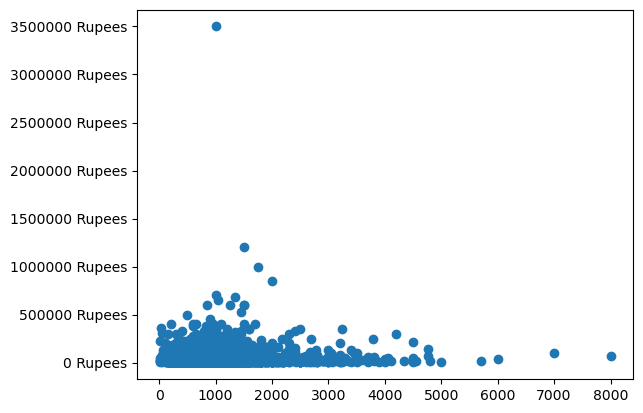

In [8]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker  

plt.scatter(data["Size"],np.sort(data["Rent"]))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f Rupees'))

It looks like our view of the data is being obscured through a few outliers wrecking the scale on the y-axis. Lets put a limit on the max y-axis value to get a closer look at most of the data.

(0.0, 600000.0)

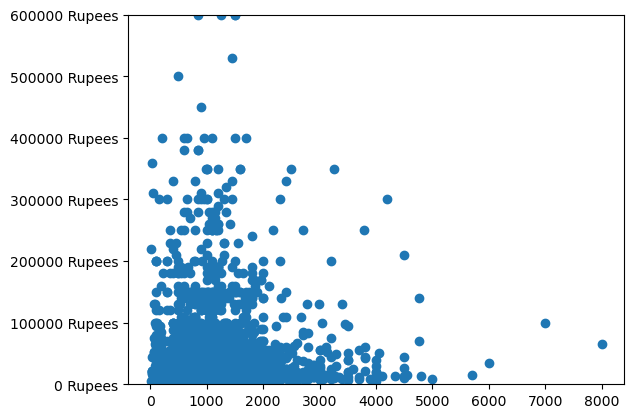

In [9]:
plt.scatter(data["Size"],np.sort(data["Rent"]))
plt.gca().yaxis.set_major_formatter(mticker.FormatStrFormatter('%.0f Rupees'))
plt.ylim(0,600000)

Looks much better, but we need to check to see how much the dense the cluster at the bottom is compared to the wider distribution above.

In [10]:
print(f"Mean Rent: {data['Rent'].mean()}")
print(f"Median Rent: {data['Rent'].median()}")

Mean Rent: 34993.45132743363
Median Rent: 16000.0


It looks like very dense, from the mean and median rent we can see that most apartments sit well under 100,000 rupees a month.

## Size

In [11]:
print(column_to_description["Size"],"\n")
print(data["Size"])

Size: Size of the Houses/Apartments/Flats in Square Feet. 

0       1100
1        800
2       1000
3        800
4        850
        ... 
4741    1000
4742    2000
4743    1750
4744    1500
4745    1000
Name: Size, Length: 4746, dtype: int64


The size of the house/apartment/flat in square feet. Mostly straightforward other than the fact that 'Area Type' decides how the square footage is calculated.

## Floor

In [12]:
print(column_to_description["Floor"],"\n")
print(data["Floor"],"\n")
print(data["Floor"].value_counts())

Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.) 

0       Ground out of 2
1            1 out of 3
2            1 out of 3
3            1 out of 2
4            1 out of 2
             ...       
4741         3 out of 5
4742         1 out of 4
4743         3 out of 5
4744       23 out of 34
4745         4 out of 5
Name: Floor, Length: 4746, dtype: object 

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64


Actual usable values are scalar but contained in a string.  To extract we just need to split into two seperate variables. One for how high in the building the room is (as a percent represented as a decimal), and the other for the total number of floors the place has.

*Maybe second variable not necessary, and might add some covariance, but being on the penthouse of a skyscraper and being on the top floor of a single floor house should affect the prediction differently.*

## Area Type

In [13]:
print(column_to_description["Area Type"],"\n")
print(data["Area Type"],"\n")
print(data["Area Type"].value_counts())

Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area. 

0        Super Area
1        Super Area
2        Super Area
3        Super Area
4       Carpet Area
           ...     
4741    Carpet Area
4742     Super Area
4743    Carpet Area
4744    Carpet Area
4745    Carpet Area
Name: Area Type, Length: 4746, dtype: object 

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64


Super area includes square feet for areas the tenant will have access to outside his apartment/house itself such as stairways, public areas, and hallways. Carpet area just includes the square footage of the apartment or house itself.

## Area Locality

In [14]:
print(column_to_description["Area Locality"],"\n")
print(data["Area Locality"],"\n")
print(data["Area Locality"].value_counts())

Area Locality: Locality of the Houses/Apartments/Flats. 

0                         Bandel
1       Phool Bagan, Kankurgachi
2        Salt Lake City Sector 2
3                    Dumdum Park
4                  South Dum Dum
                  ...           
4741                Bandam Kommu
4742        Manikonda, Hyderabad
4743        Himayath Nagar, NH 7
4744                  Gachibowli
4745             Suchitra Circle
Name: Area Locality, Length: 4746, dtype: object 

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, L

It looks like there are a lot of categories here, 2235 to be exact, and the most frequent of which, 'Bandra West',  has only 37 points. Trying to learn robust information from such few points is not a good idea, especially considering that a lot of the same information is contained in the 'City' variable as well.

(array([2.018e+03, 1.450e+02, 3.200e+01, 2.500e+01, 6.000e+00, 6.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <BarContainer object of 10 artists>)

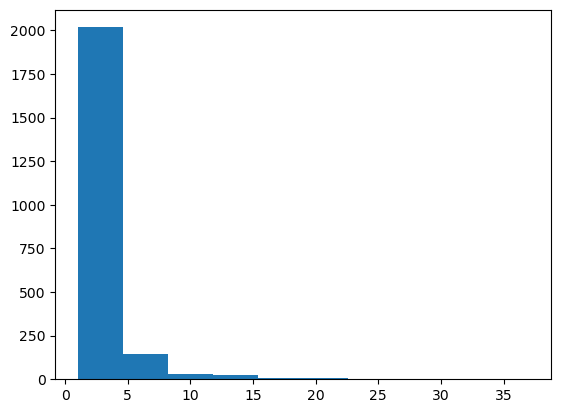

In [15]:
plt.hist(data["Area Locality"].value_counts())

Confirming what we thought, this histogram shows the frequency of repeated localities in our data.

## City

In [16]:
print(column_to_description["City"],"\n")
print(data["City"],"\n")
print(data["City"].value_counts())

City: City where the Houses/Apartments/Flats are Located. 

0         Kolkata
1         Kolkata
2         Kolkata
3         Kolkata
4         Kolkata
          ...    
4741    Hyderabad
4742    Hyderabad
4743    Hyderabad
4744    Hyderabad
4745    Hyderabad
Name: City, Length: 4746, dtype: object 

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64


The city/town in which each of these properties resides, much better than 'Area Locality' in that it has only six more major regions with 524 data points for the least populus value count. Will need to be encoded to be used effectively in our regression, one-hot encoding seems perfectly viable here as we don't have too many unique categories.

## Furnishing Status

In [17]:
print(column_to_description["Furnishing Status"],"\n")
print(data["Furnishing Status"],"\n")
print(data["Furnishing Status"].value_counts())

Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished. 

0          Unfurnished
1       Semi-Furnished
2       Semi-Furnished
3          Unfurnished
4          Unfurnished
             ...      
4741    Semi-Furnished
4742    Semi-Furnished
4743    Semi-Furnished
4744    Semi-Furnished
4745       Unfurnished
Name: Furnishing Status, Length: 4746, dtype: object 

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64


Categorical Data but seems like it would likely perform well if label-encoded as the categories are a scale from Unfurnished  through Furnished. Just need to make sure that unfurnished = 0, semi-furnished = 1, and furnished = 2.

#### currently only label encoded, this would be a great column to use k-fold target encoding given the scalar nature of the categorical variables. Not positive if it'd work unless I'm creating a condition to evaluate the rent to a boolean and not sure what boundary to pick. Maybe the median or mean?

## Tenant Preferred

In [18]:
print(column_to_description["Tenant Preferred"],"\n")
print(data["Tenant Preferred"],"\n")
print(data["Tenant Preferred"].value_counts())

Tenant Preferred: Type of Tenant Preferred by the Owner or Agent. 

0       Bachelors/Family
1       Bachelors/Family
2       Bachelors/Family
3       Bachelors/Family
4              Bachelors
              ...       
4741    Bachelors/Family
4742    Bachelors/Family
4743    Bachelors/Family
4744              Family
4745           Bachelors
Name: Tenant Preferred, Length: 4746, dtype: object 

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64


Use one-hot encoding for this, but with only two columns for 'Bachelors' and 'Family', with the 'Bachelors/Family' category just having a 1 value for both rather than it's own column.

## Bathroom

In [19]:
print(column_to_description["Bathroom"],"\n")
print(data["Bathroom"],"\n")
print(data["Bathroom"].value_counts())

Bathroom: Number of Bathrooms. 

0       2
1       1
2       1
3       1
4       1
       ..
4741    2
4742    3
4743    3
4744    2
4745    2
Name: Bathroom, Length: 4746, dtype: int64 

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64


No problem to use, simple scalar integer value.

## Point of Contact

In [20]:
print(column_to_description["Point of Contact"],"\n")
print(data["Point of Contact"], "\n")
print(data["Point of Contact"].value_counts())

Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats. 

0       Contact Owner
1       Contact Owner
2       Contact Owner
3       Contact Owner
4       Contact Owner
            ...      
4741    Contact Owner
4742    Contact Owner
4743    Contact Agent
4744    Contact Agent
4745    Contact Owner
Name: Point of Contact, Length: 4746, dtype: object 

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64


Remove contact builder since with just one data point we can't learn how this factors into the regression robustly, and since a binary category makes basic label encoding viable.

***

### Now we have a good grasp on our data, as well as what steps we'll need to take to process it for use in a regression. Let's consolidate them all below for easy reference.

## Steps to be taken based on EDA:
1. `Posted On`: Convert Date to time since start of 2022.
2. `Size`: Maybe scale this using *Area Type* if it doesn't work well in the regression elsewise. For now having *Area Type* as a label-encoded variable which learns a flat value to adjust the outcome by might be fine, but the difference between different *Size*s will vary as some super-areas will severely overestimate *Size* and some will only minimally overestimate *Size*.
3. `Floor`: One of two options seems optimal. Both involve splitting the active floor and the total floors given the building first. The first option is just having both of those as seperate columns, the second option involves the floor the unit is on as the first column, and the ratio of that to the total floors in the building as the second.
The first option seems like the data is presented more clearly, but the second allows the relationship between the two to be passed directly in, as learning that might be suboptimal in terms of limiting learning other relationships. Call these columns *On Floor* and *Building Floors* in either case.
4. `Area Type`: If used to scale *Size* then don't use this column, otherwise use binary one-hot encoding for *Carpet Area* and *Super Area*, and throw out *Built Area* as that only has two data points.
5. `City`: This needs to be one-hot encoded, definitely good in this case as there are only a small number of cities with decent data population for each. 
6. `Furnishing Status`: Label encode with the following system. *Unfurnished* = 0, *Semi-Furnished* = 1, *Furnished* = 2.
7. `Tenant Preferred`: Do a kind of custom one-hot encoding. Normally each value would get its own column, but here we can just make two instead of three as one just represents both of the previous options simultaneously.
8. `Point of Contact`: Just drop the *Contact Builder* as it only has a single data point, the other two can be label encoded with 0 and 1.